# Importing some libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [6]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Age.max()

92

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

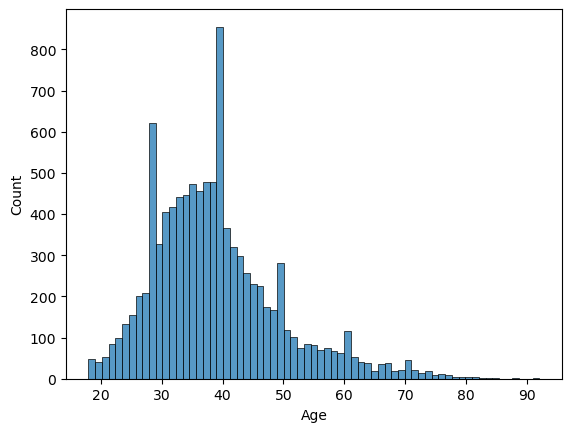

In [9]:
sns.histplot(df['Age'])

# Droping unneccessry columns

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

# Creating bins for Age columns

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
bined=KBinsDiscretizer(encode='ordinal',strategy='uniform',dtype=None)

In [ ]:
bined

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [ ]:
df['age_bin']=bined.fit_transform(df[['Age']])

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_bin'],
      dtype='object')

<Axes: >

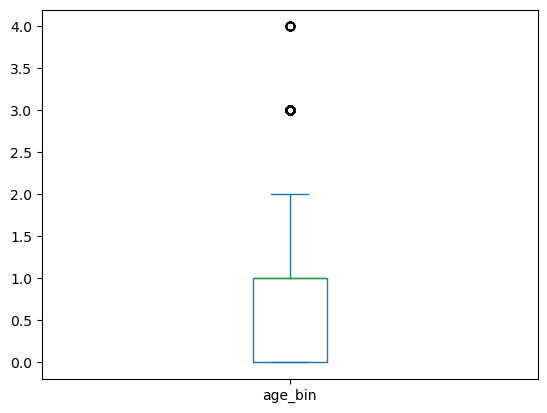

In [ ]:
df['age_bin'].plot(kind='box')

In [ ]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
age_bin               5
dtype: int64

In [ ]:

# time=[18,30,45,60,75,80]

# category=[0,1,2,3,4]

# df["age_bin"] = pd.cut(df["Age"], bins=time, labels=category, right=False)

In [ ]:
df['age_bin'].value_counts()

age_bin
1.0    5500
0.0    2790
2.0    1351
3.0     335
4.0      24
Name: count, dtype: int64

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_bin'],
      dtype='object')

In [ ]:
df.drop(columns=['Age'],inplace=True)

In [ ]:
X = df.drop(columns=['Exited']).values
y = df['Exited'].values

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 101348.88, 1.0],
       [608, 'Spain', 'Female', ..., 1, 112542.58, 1.0],
       [502, 'France', 'Female', ..., 0, 113931.57, 1.0],
       ...,
       [709, 'France', 'Female', ..., 1, 42085.58, 1.0],
       [772, 'Germany', 'Male', ..., 0, 92888.52, 1.0],
       [792, 'France', 'Female', ..., 0, 38190.78, 0.0]], dtype=object)

# One hot encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[1])],remainder='passthrough')

In [ ]:
X = ct.fit_transform(X)


In [ ]:
ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[4])],remainder='passthrough')
X = ct.fit_transform(X)


In [ ]:
X[4]

array([1.0, 0.0, 0.0, 0.0, 1.0, 850, 2, 125510.82, 1, 1, 1, 79084.1, 1.0],
      dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X = sta.fit_transform(X)

In [ ]:
X

array([[ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
         0.02188649,  0.09274048],
       [ 1.09598752, -1.09598752, -1.00280393, ...,  0.97024255,
         0.21653375,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
         0.2406869 ,  0.09274048],
       ...,
       [ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
        -1.00864308,  0.09274048],
       [-0.91241915,  0.91241915, -1.00280393, ..., -1.03067011,
        -0.12523071,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
        -1.07636976, -1.2378259 ]])

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# logistic regression
# polynomial regression


# Importing the models

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [ ]:
classifiers = {}


classifiers['SGDClassifier'] = SGDClassifier()
classifiers['Logistic Regression'] = LogisticRegression()
classifiers['K-Nearest Neighbors'] = KNeighborsClassifier()
classifiers['Support Vector Machine'] = SVC()
classifiers['Decision Tree'] = DecisionTreeClassifier()
classifiers['Random Forest'] = RandomForestClassifier()


# Training the models

In [ ]:
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training SGDClassifier...
Evaluating SGDClassifier...
Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1595
           1       0.55      0.09      0.15       405

    accuracy                           0.80      2000
   macro avg       0.68      0.54      0.52      2000
weighted avg       0.76      0.80      0.74      2000

Training Logistic Regression...
Evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.57      0.21      0.31       405

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Classification Report for K-Nearest Neighbors:
              precision  

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)

Evaluating SGDClassifier...
Evaluation Metrics for SGDClassifier:
Accuracy: 0.801
Precision: 0.5538461538461539
Recall: 0.08888888888888889
F1-Score: 0.15319148936170213
ROC AUC: 0.5353535353535354
Confusion Matrix for SGDClassifier:
[[1566   29]
 [ 369   36]]
Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.8085
Precision: 0.5733333333333334
Recall: 0.2123456790123457
F1-Score: 0.3099099099099099
ROC AUC: 0.586110143581408
Confusion Matrix for Logistic Regression:
[[1531   64]
 [ 319   86]]
Evaluating K-Nearest Neighbors...
Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.817
Precision: 0.5719557195571956
Recall: 0.38271604938271603
F1-Score: 0.45857988165680474
ROC AUC: 0.6549943883277216
Confusion Matrix for K-Nearest Neighbors:
[[1479  116]
 [ 250  155]]
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8545
Precision: 0.8131868131868132
Recall: 0.3654320987654321
F1-Score: 0.5042589437819

In [ ]:
for name, model in classifiers.items():
    print(f"Plotting Confusion Matrix for {name}...")
    
    # Generate predictions
    y_pred = model.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Class 0', 'Class 1'])
    disp.ax_.set_title(f"Confusion Matrix for {name}")
    plt.show()

Plotting Confusion Matrix for SGDClassifier...


NameError: name 'plot_confusion_matrix' is not defined

# Hyper_parameter Tuning

In [ ]:
# param_grid = {
#     'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
#     'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9, 11]},
#     'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf','linear','poly']},
#     'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
#     'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
#     'SGDClassifier': {'loss': ['hinge', 'log_loss'], 'penalty': ['l1', 'l2'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
# }



# # Perform grid search with cross-validation for each classifier
# for name, model in classifiers.items():
#     print(f"Tuning hyperparameters for {name}...")
#     grid_search = GridSearchCV(model, param_grid[name], cv=5, n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     print(f"Best parameters for {name}: {grid_search.best_params_}")
#     print(f"Best cross-validation score for {name}: {grid_search.best_score_}")
#     print("="*50)


Tuning hyperparameters for SGDClassifier...
Best parameters for SGDClassifier: {'alpha': 0.001, 'loss': 'log_loss', 'penalty': 'l2'}
Best cross-validation score for SGDClassifier: 0.810125
Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01}
Best cross-validation score for Logistic Regression: 0.810375
Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7}
Best cross-validation score for K-Nearest Neighbors: 0.8195
Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Best cross-validation score for Support Vector Machine: 0.8498750000000002
Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.8327500000000001
Tuning hyperparameters for Random Forest...
Best parameters for Random For

In [ ]:
para_grid = {'n_estimators': [100, 200, 300,500], 'max_depth': [None, 10, 20, 30,50], 'min_samples_split': [2, 5, 10,20]}

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)

Evaluating SGDClassifier...
Evaluation Metrics for SGDClassifier:
Accuracy: 0.806
Precision: 0.7428571428571429
Recall: 0.06419753086419754
F1-Score: 0.1181818181818182
ROC AUC: 0.5292774488176787
Confusion Matrix for SGDClassifier:
[[1586    9]
 [ 379   26]]
Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.8085
Precision: 0.5733333333333334
Recall: 0.2123456790123457
F1-Score: 0.3099099099099099
ROC AUC: 0.586110143581408
Confusion Matrix for Logistic Regression:
[[1531   64]
 [ 319   86]]
Evaluating K-Nearest Neighbors...
Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.817
Precision: 0.5719557195571956
Recall: 0.38271604938271603
F1-Score: 0.45857988165680474
ROC AUC: 0.6549943883277216
Confusion Matrix for K-Nearest Neighbors:
[[1479  116]
 [ 250  155]]
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8545
Precision: 0.8131868131868132
Recall: 0.3654320987654321
F1-Score: 0.50425894378194

Based on the evaluation metrics, the best model appears to be Random Forest so far

# Applying Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, nn_predictions)
precision = precision_score(y_test, nn_predictions)
recall = recall_score(y_test, nn_predictions)
f1 = f1_score(y_test, nn_predictions)
conf_matrix = confusion_matrix(y_test, nn_predictions)

# Print evaluation metrics
print("Evaluation Metrics for MLPClassifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'nn_predictions' is not defined

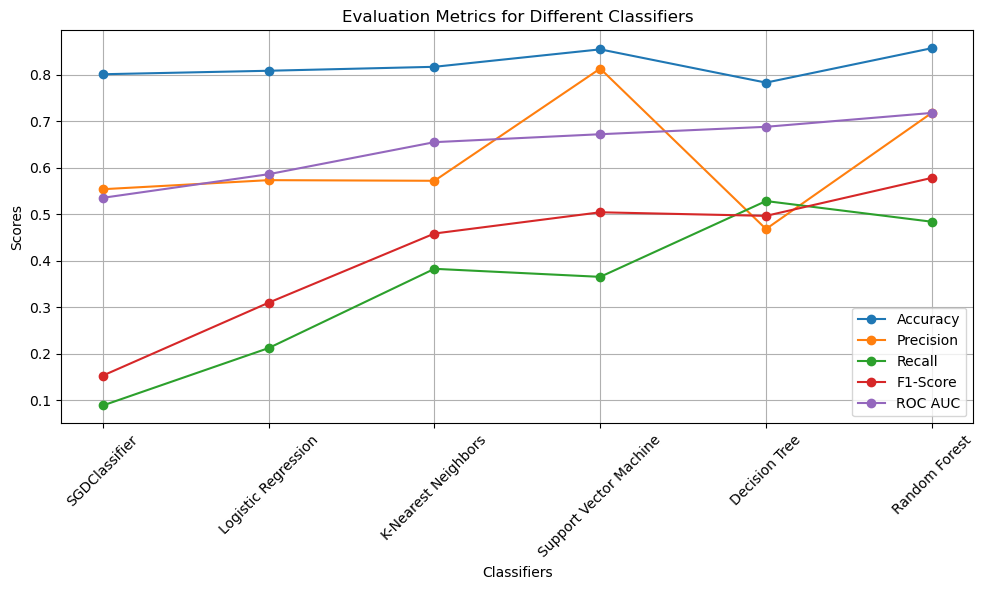

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store scores for each metric
metric_scores = {metric: [] for metric in metrics}

# Loop through classifiers and calculate scores
for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    # Store scores for each metric
    for metric in metrics:
        metric_scores[metric].append(scores[metric])

# Plotting
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(list(classifiers.keys()), metric_scores[metric], label=metric, marker='o')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


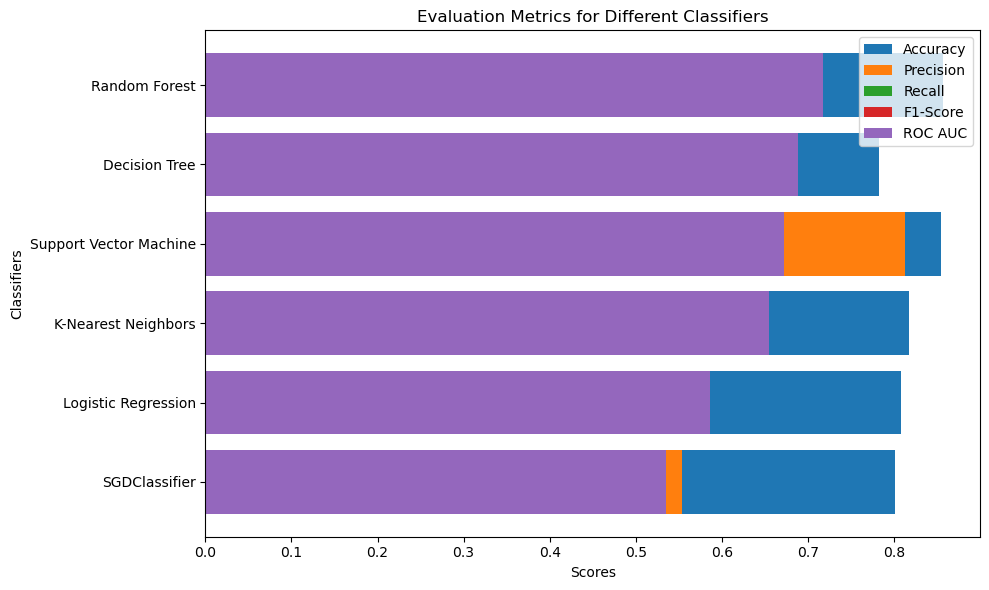

'\n# Iterate over classifiers\nfor name, model in classifiers.items():\n    # Calculate predictions\n    y_pred = model.predict(X_test)\n    \n    # Calculate evaluation metrics\n    scores = {\n        \'Accuracy\': accuracy_score(y_test, y_pred),\n        \'Precision\': precision_score(y_test, y_pred),\n        \'Recall\': recall_score(y_test, y_pred),\n        \'F1-Score\': f1_score(y_test, y_pred),\n        \'ROC AUC\': roc_auc_score(y_test, y_pred)\n    }\n    \n    # Plotting\n    plt.figure(figsize=(10, 6))\n    plt.bar(scores.keys(), scores.values(), color=\'skyblue\')\n    plt.title(f"Evaluation Metrics for {name}")\n    plt.xlabel(\'Metrics\')\n    plt.ylabel(\'Scores\')\n    plt.xticks(rotation=45)\n    plt.show()\n'

In [ ]:
# Plotting a bar plot
# plt.figure(figsize=(10, 6))

# for metric in metrics:
#     plt.bar(list(classifiers.keys()), metric_scores[metric], label=metric)

# plt.xlabel('Classifiers')
# plt.ylabel('Scores')
# plt.title('Evaluation Metrics for Different Classifiers')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()




plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.barh(list(classifiers.keys()), metric_scores[metric], label=metric)

plt.ylabel('Classifiers')
plt.xlabel('Scores')
plt.title('Evaluation Metrics for Different Classifiers')
plt.legend()
plt.tight_layout()
plt.show()


# # Create subplots for each metric
# fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 6), sharex=True)

# # Loop through each metric and plot
# for i, metric in enumerate(metrics):
#     axes[i].bar(list(classifiers.keys()), metric_scores[metric])
#     axes[i].set_ylabel(metric)
#     axes[i].set_title(f'{metric} for Different Classifiers')

# # Set common x-axis label
# fig.text(0.5, 0.04, 'Classifiers', ha='center')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()
'''
# Iterate over classifiers
for name, model in classifiers.items():
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(scores.keys(), scores.values(), color='skyblue')
    plt.title(f"Evaluation Metrics for {name}")
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.xticks(rotation=45)
    plt.show()
'''




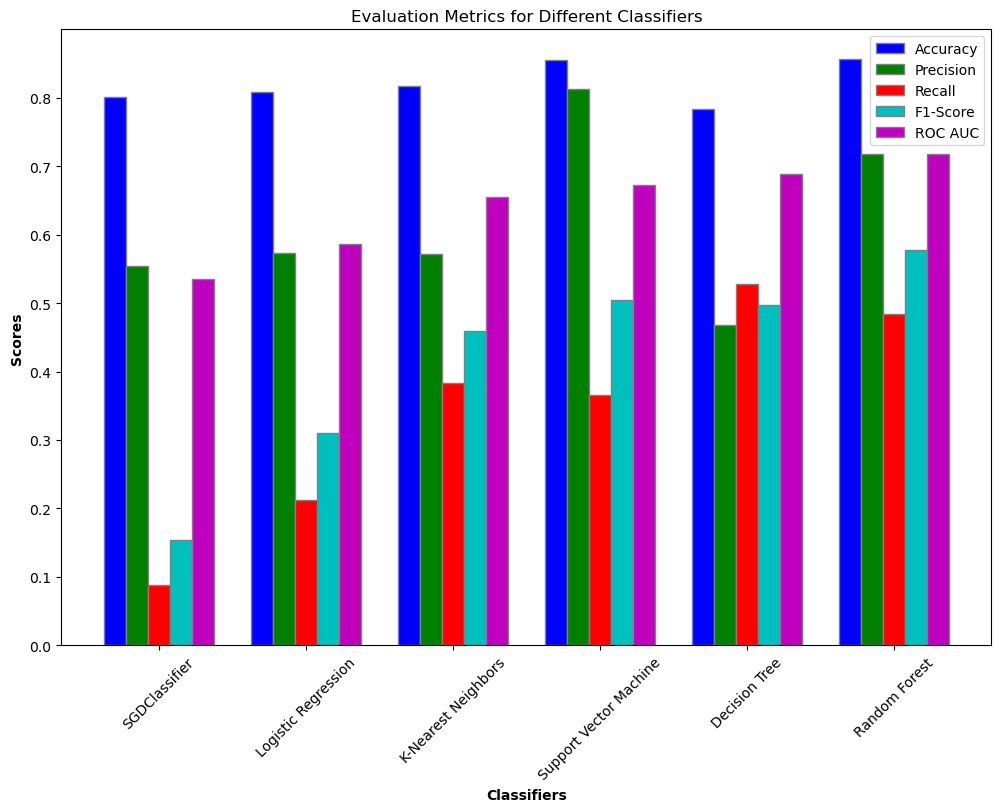

In [ ]:
import numpy as np

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bar
bar_width = 0.15

# Set position of bar on X axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Define colors for each metric
colors = ['b', 'g', 'r', 'c', 'm']

# Plotting bars for each metric
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(r1 + i * bar_width, [metric_scores[metric][i] for i in range(len(classifiers))], color=color, width=bar_width, edgecolor='grey', label=metric)

# Add xticks on the middle of the group bars
ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_xticks([r + 2 * bar_width for r in range(len(classifiers))])
ax.set_xticklabels(classifiers.keys(), rotation=45)

# Create legend & Show graphic
ax.legend()
plt.title('Evaluation Metrics for Different Classifiers')
plt.show()


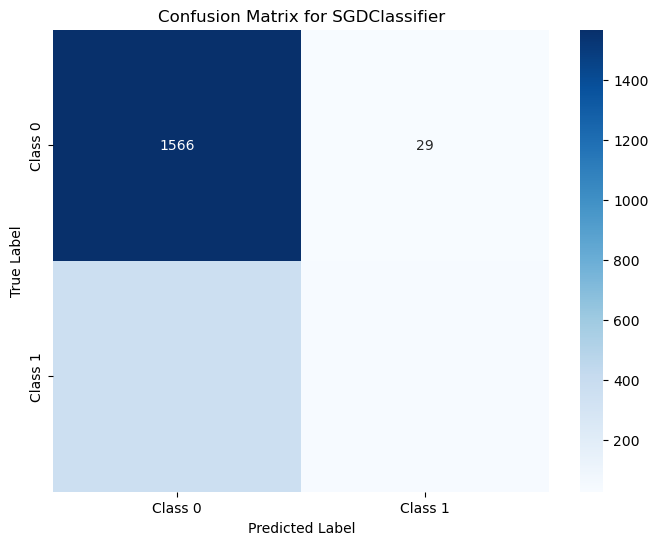

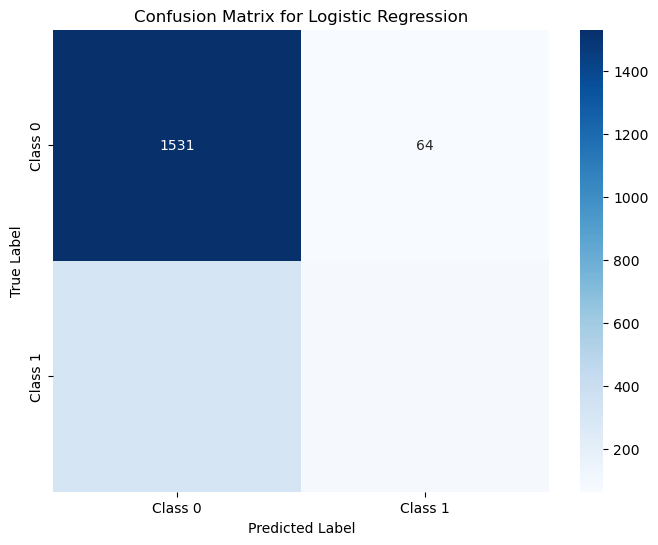

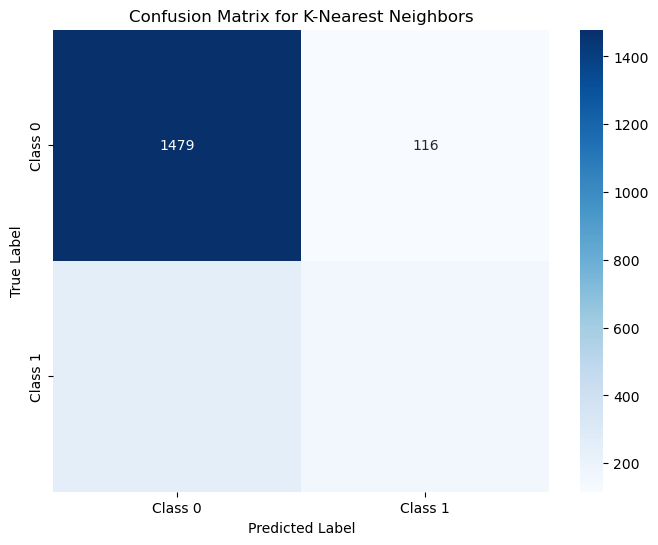

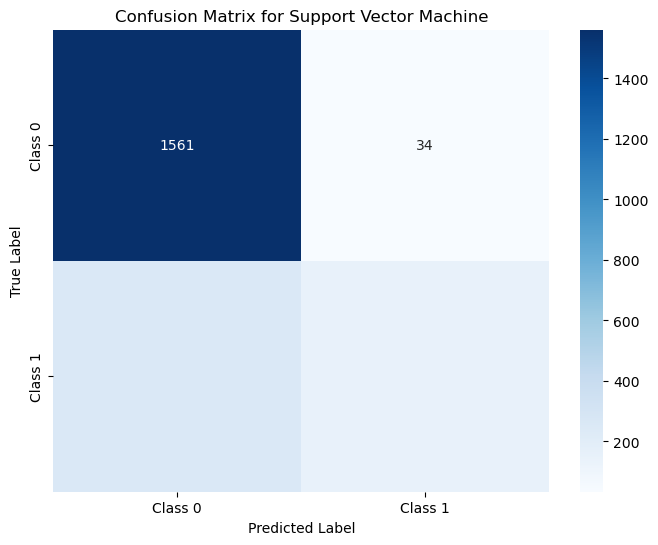

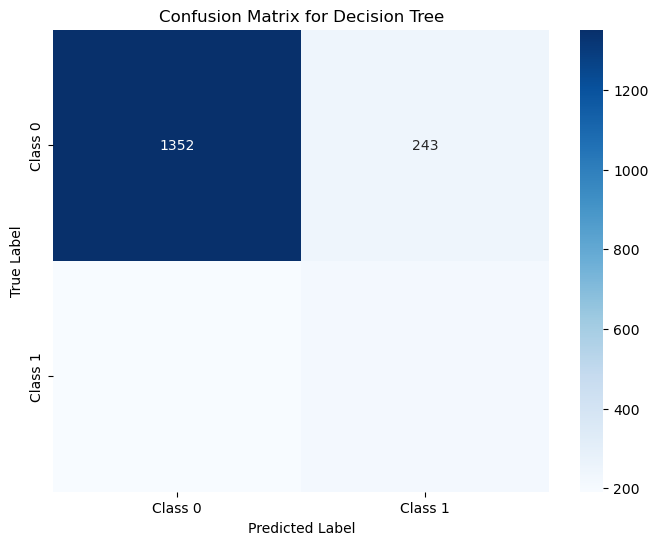

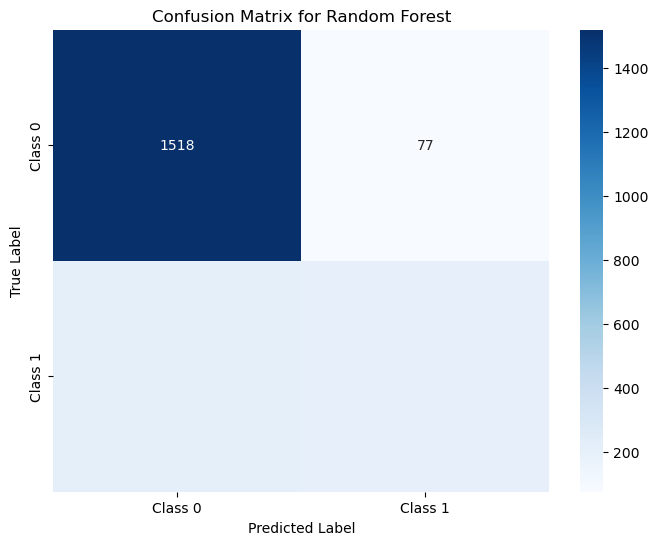

In [ ]:
# for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Iterate over classifiers
for name, model in classifiers.items():
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


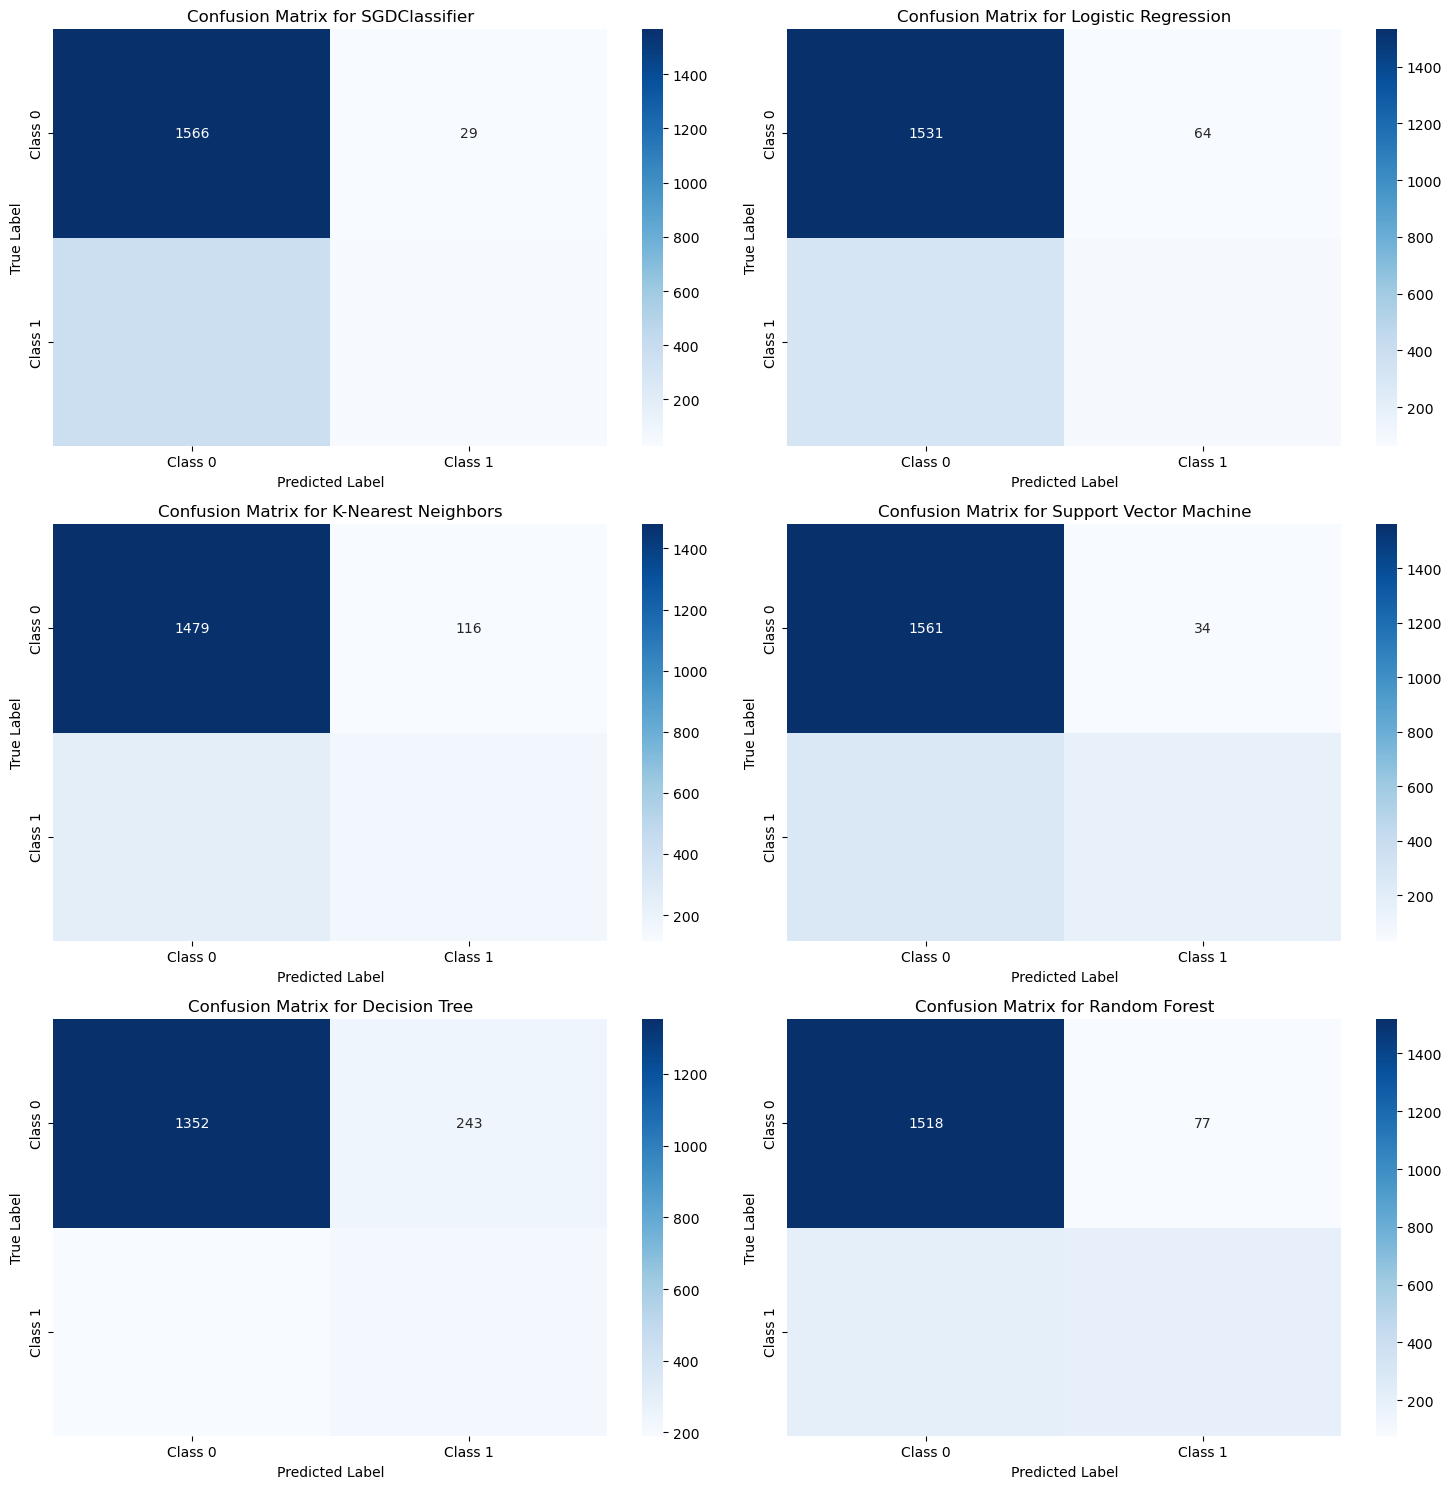

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set up subplots
num_classifiers = len(classifiers)
num_rows = num_classifiers // 2 + num_classifiers % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterate over classifiers
for (name, model), ax in zip(classifiers.items(), axes.flatten()):
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()
